In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv("water-treatment.csv")
print(data)

          date      Q-E  ZN-E  PH-E  DBO-E  DQO-E   SS-E  SSV-E  SED-E  \
0     D-1/3/90  44101.0  1.50   7.8    NaN  407.0  166.0   66.3    4.5   
1     D-2/3/90  39024.0  3.00   7.7    NaN  443.0  214.0   69.2    6.5   
2     D-4/3/90  32229.0  5.00   7.6    NaN  528.0  186.0   69.9    3.4   
3     D-5/3/90  35023.0  3.50   7.9  205.0  588.0  192.0   65.6    4.5   
4     D-6/3/90  36924.0  1.50   8.0  242.0  496.0  176.0   64.8    4.0   
..         ...      ...   ...   ...    ...    ...    ...    ...    ...   
522  D-26/8/91  32723.0  0.16   7.7   93.0  252.0  176.0   56.8    2.3   
523  D-27/8/91  33535.0  0.32   7.8  192.0  346.0  172.0   68.6    4.0   
524  D-28/8/91  32922.0  0.30   7.4  139.0  367.0  180.0   64.4    3.0   
525  D-29/8/91  32190.0  0.30   7.3  200.0  545.0  258.0   65.1    4.0   
526  D-30/8/91  30488.0  0.21   7.5  152.0  300.0  132.0   69.7    NaN   

     COND-E  ...  COND-S  RD-DBO-P  RD-SS-P  RD-SED-P  RD-DBO-S  RD-DQO-S  \
0      2110  ...  2000.0       NaN

In [52]:
data = data.fillna(data.mean())

In [53]:
#2.1 Find correlation between input and output parameter values. Example: pH-E and pH-S.
data_corr = data.corr()
data_corr = data_corr[['PH-S','DBO-S','DQO-S','SS-S','SSV-S','SED-S','COND-S']].loc[['PH-E','DBO-E','DQO-E','SS-E','SSV-E','SED-E','COND-E']]

<AxesSubplot:>

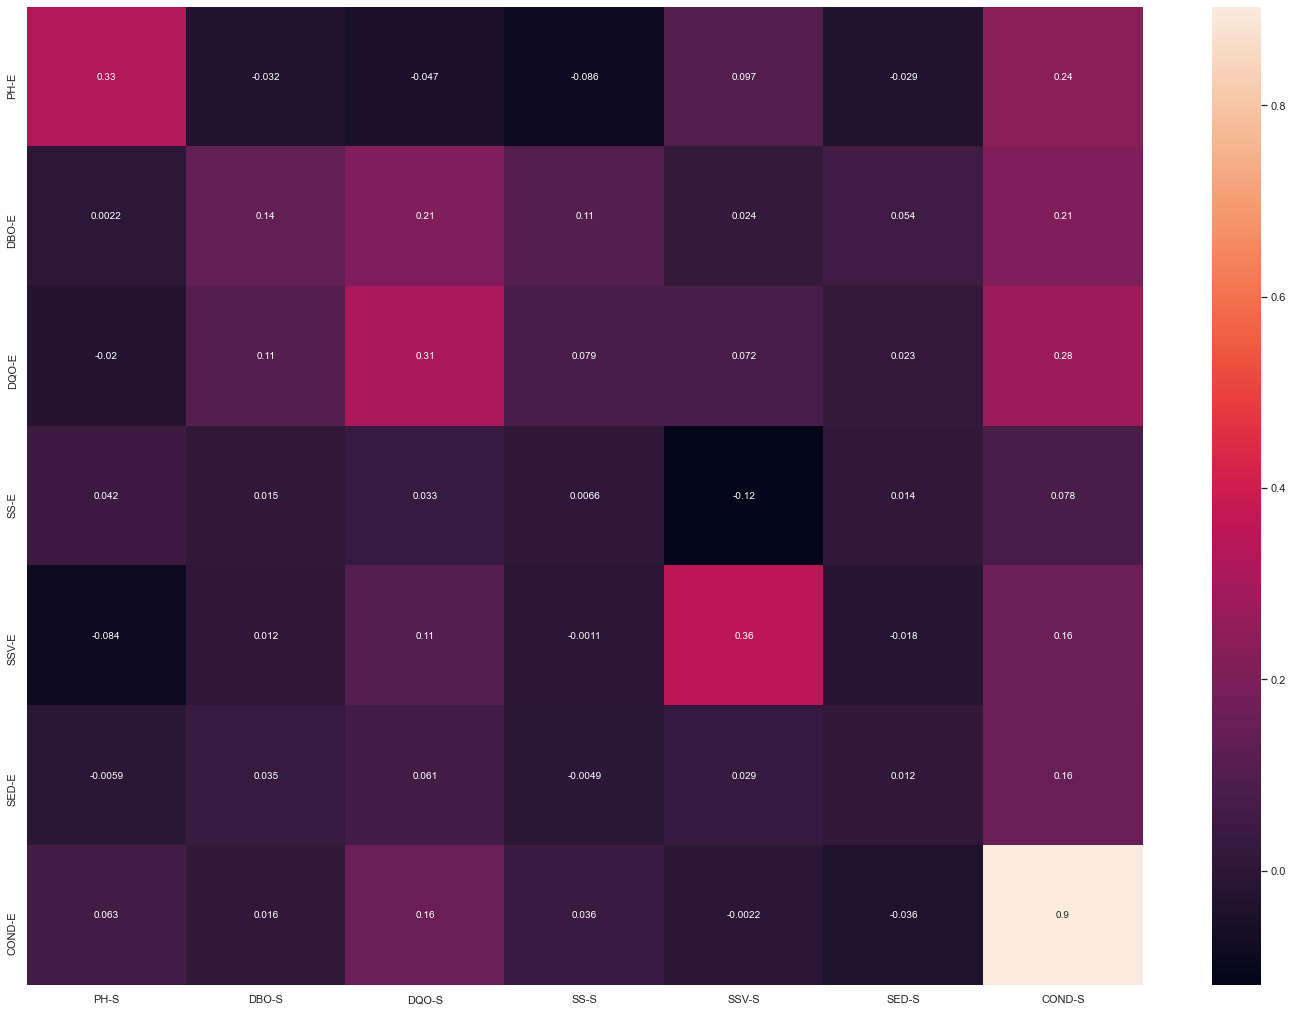

In [54]:
plt.figure(figsize=(25,18))
sns.heatmap(data_corr, annot=True)

In [55]:
#2.2 Add a new column called ‘SAFE-PH-S’. It is ‘yes’ if pH is within 6.5-8.5 and ‘no’ otherwise, i.e., <= 6.5 and > 8.5
#import math
df = pd.DataFrame(data)

df["SAFE-PH-S"] = ""
df["PH-S"] = pd.to_numeric(df["PH-S"], downcast="float")
phs = df["PH-S"]
for index, x in enumerate(phs, start=0):
    #x = round(x,2)
    if x >= 7.3 and x <= 7.5:
        df.at[index, 'SAFE-PH-S'] = "YES"
    else:
        df.at[index, 'SAFE-PH-S'] = "NO"
df.head()


,date,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,...,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G,SAFE-PH-S
0,D-1/3/90,44101.0,1.5,7.8,188.714286,407.0,166.0,66.3,4.5,2110,...,39.085806,58.8,95.5,83.448049,70.0,89.013646,79.4,87.3,99.6,YES
1,D-2/3/90,39024.0,3.0,7.7,188.714286,443.0,214.0,69.2,6.5,2660,...,39.085806,60.7,94.8,83.448049,80.8,89.013646,79.5,92.1,100.0,YES
2,D-4/3/90,32229.0,5.0,7.6,188.714286,528.0,186.0,69.9,3.4,1666,...,39.085806,58.2,95.6,83.448049,52.9,89.013646,75.8,88.7,98.5,NO
3,D-5/3/90,35023.0,3.5,7.9,205.000000,588.0,192.0,65.6,4.5,2430,...,33.100000,64.2,95.3,87.300000,72.3,90.200000,82.3,89.6,100.0,NO
4,D-6/3/90,36924.0,1.5,8.0,242.000000,496.0,176.0,64.8,4.0,2110,...,39.085806,62.7,95.6,83.448049,71.0,92.100000,78.2,87.5,99.5,NO


In [ ]:
#2.3 Train a classifier to predict SAFE-PH-S using any two classification methods. Show its performance measures.
# * Use 20% data for testing
# * Use any standard validation method (leave one out, 10-fold cross validation)

<AxesSubplot:xlabel='PH-S', ylabel='count'>

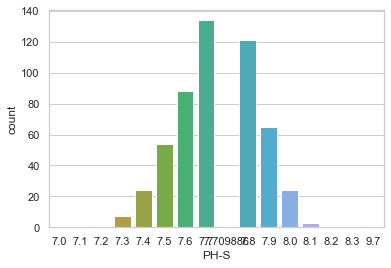

In [71]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
sns.countplot(x=data['PH-S'], data=data)

In [77]:
from sklearn.model_selection import train_test_split
X = data['PH-S']
y = data['SAFE-PH-S']
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)
display(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(421,)

(421,)

(159, 39)

(106,)

In [87]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[7.5999999  7.5999999  7.80000019 7.69999981 7.9000001  7.5
 7.9000001  7.80000019 7.80000019 7.9000001  7.9000001  7.69999981
 7.69999981 7.5999999  7.69999981 7.80000019 7.80000019 7.69999981
 7.80000019 7.5        7.5        7.80000019 7.5        7.5
 7.80000019 8.10000038 7.9000001  7.5        7.4000001  7.5
 7.5        7.80000019 7.9000001  7.9000001  7.80000019 7.69999981
 7.80000019 7.5999999  7.5        7.80000019 7.80000019 7.80000019
 7.80000019 7.9000001  7.69999981 7.4000001  7.80000019 7.4000001
 7.69999981 7.9000001  7.80000019 7.69999981 7.5        7.9000001
 7.80000019 7.5999999  7.5        7.80000019 7.69999981 7.5999999
 7.5999999  7.5        7.5999999  7.5        7.80000019 7.80000019
 7.5999999  7.5999999  7.9000001  7.5        7.5        7.80000019
 7.5999999  7.69999981 7.80000019 7.69999981 7.5999999  7.5
 7.0999999  7.69999981 7.5        7.9000001  7.5999999  7.69999981
 7.69999981 7.5        7.80000019 7.69999981 7.69999981 7.5
 7.69999981 7.69999981 7.69999981 7.80000019 7.5        7.5
 7.80000019 7.9000001  7.69999981 7.80000019 7.69999981 7.80000019
 7.9000001  7.5        7.9000001  7.80000019 7.69999981 7.69999981
 7.69999981 7.9000001  7.80000019 7.69999981 7.4000001  7.80000019
 7.69999981 7.80000019 7.80000019 7.9000001  7.69999981 7.80000019
 7.4000001  7.80000019 7.69999981 7.80000019 7.5999999  7.80000019
 7.69999981 7.80000019 7.9000001  7.69999981 8.         7.80000019
 7.5        7.80000019 7.5999999  7.69999981 7.9000001  8.
 7.5        7.5999999  7.9000001  7.5999999  7.5999999  7.69999981
 7.4000001  7.69999981 7.5999999  7.69999981 7.5999999  7.4000001
 7.5999999  7.9000001  7.5999999  7.80000019 7.9000001  7.80000019
 8.         7.5999999  7.5999999  7.69999981 7.5999999  7.69999981
 7.4000001  7.4000001  8.         7.69999981 7.69999981 7.69999981
 7.80000019 7.9000001  7.5999999  7.5999999  7.30000019 7.69999981
 7.5        7.9000001  7.5999999  7.5999999  7.69999981 7.69999981
 7.5        7.5        7.9000001  7.69999981 7.69999981 7.5999999
 7.9000001  7.69999981 7.5        7.80000019 7.69999981 7.5999999
 7.5999999  7.80000019 7.5999999  7.9000001  7.4000001  7.69999981
 7.4000001  7.69999981 7.69999981 7.69999981 7.69999981 7.9000001
 7.69999981 8.         7.69999981 7.9000001  7.5999999  7.80000019
 7.5999999  7.69999981 7.69999981 7.5        7.69999981 8.
 7.69999981 7.69999981 7.5999999  7.80000019 7.69999981 7.9000001
 7.69999981 7.80000019 7.69999981 7.5999999  8.         7.5999999
 7.5999999  7.80000019 7.69999981 7.80000019 7.9000001  7.80000019
 7.80000019 7.69999981 7.4000001  8.10000038 7.30000019 7.5999999
 7.69999981 7.5999999  7.80000019 7.5999999  7.9000001  7.80000019
 7.80000019 7.80000019 7.80000019 7.4000001  7.5999999  7.80000019
 7.80000019 7.4000001  7.5        7.69999981 7.9000001  7.69999981
 7.69999981 7.5999999  7.69999981 7.5999999  7.80000019 8.
 7.5        7.9000001  7.9000001  7.9000001  7.9000001  7.69999981
 7.9000001  7.9000001  7.9000001  7.80000019 7.69999981 7.80000019
 7.5999999  7.69999981 7.80000019 7.4000001  7.69999981 7.69999981
 7.5999999  7.9000001  7.5999999  7.9000001  7.5        7.5999999
 7.69999981 7.5999999  7.9000001  7.80000019 7.80000019 7.69999981
 7.5999999  7.9000001  7.5        7.80000019 7.5999999  7.69999981
 7.69999981 7.9000001  7.5999999  7.4000001  7.80000019 7.69999981
 7.30000019 7.19999981 7.5999999  7.9000001  7.69999981 7.69999981
 8.         7.9000001  7.80000019 7.80000019 7.69999981 7.9000001
 7.5        7.4000001  7.69999981 7.69999981 7.9000001  7.9000001
 7.80000019 7.69999981 7.4000001  7.69999981 7.5999999  7.80000019
 7.9000001  7.69999981 8.         7.80000019 7.80000019 7.4000001
 7.69999981 7.80000019 7.80000019 7.80000019 7.80000019 7.69999981
 7.5999999  7.5999999  7.5999999  8.10000038 7.80000019 7.69999981
 7.9000001  7.9000001  7.9000001  7.5999999  7.80000019 7.5
 7.69999981 8.         7.5999999  7.80000019 7.80000019 7.69999981
 7.80000019 7.5        7.5        7.69999981 7.9000001  7.69999981
 7.9000001  7.5999999  7.5        7.80000019 7.69999981 7.69999981
 7.69999981 7.9000001  7.4000001  7.69999981 7.4000001  7.69999981
 7.69999981 7.69999981 7.9000001  7.4000001  7.69999981 7.69999981
 7.5        8.         7.9000001  7.5999999  8.         7.5
 7.5        7.69999981 7.80000019 7.80000019 7.5999999  7.80000019
 7.69999981 7.5999999  7.80000019 7.69999981 8.         7.69999981
 7.80000019 7.69999981 7.9000001  7.5999999  7.5        7.4000001
 7.69999981 7.5        8.19999981 7.80000019 7.80000019 7.5999999
 7.5999999  7.5999999  7.30000019 7.69999981 7.5999999  7.80000019
 7.5999999 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [98]:
#3.1 Data preparation: Make a subset which only refers to pH data. Add a new column called ‘SAFE-PH’. It is ‘yes’ if pH is within 6.5-8.5 and ‘no’ otherwise, i.e., <= 6.5 and > 8.5
water_atlas = pd.read_csv("WaterAtlas-ManySites.csv", error_bad_lines=False)

b'Skipping line 4: expected 17 fields, saw 18\nSkipping line 7: expected 17 fields, saw 18\nSkipping line 9: expected 17 fields, saw 18\nSkipping line 10: expected 17 fields, saw 18\nSkipping line 17: expected 17 fields, saw 18\nSkipping line 23: expected 17 fields, saw 18\nSkipping line 25: expected 17 fields, saw 18\nSkipping line 26: expected 17 fields, saw 18\nSkipping line 27: expected 17 fields, saw 18\nSkipping line 28: expected 17 fields, saw 18\nSkipping line 29: expected 17 fields, saw 18\nSkipping line 30: expected 17 fields, saw 19\nSkipping line 31: expected 17 fields, saw 18\nSkipping line 32: expected 17 fields, saw 18\nSkipping line 33: expected 17 fields, saw 18\nSkipping line 42: expected 17 fields, saw 18\nSkipping line 50: expected 17 fields, saw 19\nSkipping line 51: expected 17 fields, saw 18\nSkipping line 58: expected 17 fields, saw 18\nSkipping line 59: expected 17 fields, saw 18\nSkipping line 68: expected 17 fields, saw 18\nSkipping line 69: expected 17 field

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [100]:
atlas_df = pd.DataFrame(water_atlas)
atlas_df = atlas_df.loc[atlas_df['Characteristic'] == "pH"]

In [101]:
#atlas_df["SAFE-PH-S"] = ""
#atlas_df['ResultValue'] = pandas.to_numeric(atlas_df['ResultValue'], errors='coerce')
#atlas_phs = atlas_df['ResultValue']
#for x in atlas_phs:
#    if x >= 7.6 and x <= 7.8:
#        atlas_df['SAFE-PH-S'] = "YES"
#    else:
#        atlas_df['SAFE-PH-S'] = "NO"
#atlas_df.head()

#df = pandas.DataFrame(data)

atlas_df["SAFE-PH-S"] = ""
atlas_df['ResultValue'] = pd.to_numeric(atlas_df['ResultValue'], downcast="float")
atlas_phs = atlas_df['ResultValue']
for index, x in enumerate(atlas_phs, start=0):
    #x = round(x,2)
    if x >= 6.5 and x <= 7.5:
        atlas_df.at[index, 'SAFE-PH-S'] = "YES"
    else:
        atlas_df.at[index, 'SAFE-PH-S'] = "NO"
atlas_df.head()
        

,DataSourceName,DataSourceCode,StationID,ActualStationID,Latitude_DD,Longitude_DD,SampleDate,SampleTime,ActivityDepth,ActivityDepthUnit,Characteristic,ResultValue,ResultUnit,ValueQualifier,ResultComment,WaterbodyID,WaterbodyName,SAFE-PH-S
0,LAKEWATCH Supplemental Water Quality Sampling,LAKEWATCH_SUPP,Bugg Springs-Lake,NaN,28.75361,-81.90444,1991-08-18 00:00:00.000,00:00:00,NaN,NaN,pH,7.5,None,NaN,NaN,8509.0,Bugg Spring,YES
13,LAKEWATCH Supplemental Water Quality Sampling,LAKEWATCH_SUPP,Bugg Springs-Lake,NaN,28.75361,-81.90444,1991-03-10 00:00:00.000,00:00:00,NaN,NaN,pH,7.7,None,NaN,NaN,8509.0,Bugg Spring,YES
40,LAKEWATCH Supplemental Water Quality Sampling,LAKEWATCH_SUPP,Bugg Springs-Lake,NaN,28.75361,-81.90444,1991-08-18 00:00:00.000,00:00:00,NaN,NaN,pH,7.6,None,NaN,NaN,8509.0,Bugg Spring,NO
59,LAKEWATCH Supplemental Water Quality Sampling,LAKEWATCH_SUPP,Church-Lake,NaN,28.64625,-81.84342,1995-02-13 00:00:00.000,00:00:00,NaN,NaN,pH,5.9,None,NaN,NaN,7844.0,Church Lake,NO
70,LAKEWATCH Supplemental Water Quality Sampling,LAKEWATCH_SUPP,Turkey-Lake,NaN,28.70128,-81.85039,1995-02-13 00:00:00.000,00:00:00,NaN,NaN,pH,6.1,None,NaN,NaN,8186.0,Turkey Lake,YES


In [ ]:
#3.2 Train a classifier to predict SAFE-PH using any two classification methods. Show its performance measures.
# * Use 20% data for testing
# * Use any standard validation method (leave one out, 10-fold cross validation)

In [102]:
from sklearn.model_selection import train_test_split
X = atlas_df['ResultValue']
y = atlas_df['SAFE-PH-S']
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)
display(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(750,)

(750,)

(159, 39)

(188,)

In [103]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[7.30000019        nan 7.5999999         nan 5.80000019 5.80000019
 6.5999999  6.80000019        nan        nan 7.51000023 6.0999999
        nan 7.69999981        nan        nan        nan        nan
 6.07000017 7.38999987        nan 7.3499999         nan 6.63999987
        nan 5.5999999  7.21000004 7.07999992 6.0999999  6.0999999
 7.5        7.69999981        nan        nan 7.92000008 5.96999979
        nan        nan 6.94999981        nan 6.69999981 7.5
 5.9000001  7.38999987 7.19999981        nan 6.92000008 7.30000019
 7.44999981        nan        nan 7.30999994 7.69000006 6.63000011
 6.61000013 7.5999999  7.48999977 7.05000019        nan 6.86999989
        nan 7.30000019        nan        nan 7.63999987        nan
 7.57000017        nan 6.71999979        nan 7.38000011        nan
 7.         7.5        7.69999981 7.05999994        nan 5.96999979
 6.0999999         nan        nan        nan        nan        nan
        nan 6.0999999         nan 7.44999981 6.76999998 7.5999999
 4.9000001         nan 7.9000001         nan 7.59000015 6.69999981
 7.0999999  7.11000013 7.17000008        nan        nan 7.40999985
 7.9000001         nan 6.69999981 6.         7.38999987        nan
 7.59000015 7.26000023        nan 6.75       6.67999983 7.32999992
 7.51999998        nan 6.32000017        nan 7.21000004        nan
 7.63999987        nan        nan        nan        nan        nan
 7.42000008 6.30000019 7.51000023 7.30000019        nan        nan
 6.75       5.94999981        nan 7.15999985 7.48000002        nan
        nan 6.94999981        nan        nan 7.46999979 7.80000019
 6.92999983 7.38999987 6.86999989        nan        nan        nan
 5.30000019        nan        nan 7.23999977 5.82000017        nan
 7.30999994 7.80000019 7.21000004 7.51000023        nan 6.5999999
        nan 7.61999989        nan        nan 5.4000001         nan
        nan        nan        nan        nan        nan 6.80000019
        nan 7.38999987 7.40999985 8.11999989        nan        nan
 7.19000006        nan        nan        nan        nan 7.46000004
        nan        nan        nan        nan 7.69999981        nan
        nan        nan 7.36999989 7.32999992 6.9000001         nan
        nan 7.42999983        nan 6.69999981        nan        nan
 7.82999992 7.28999996        nan        nan        nan 7.55000019
        nan 6.71000004 6.5999999         nan 7.32999992        nan
        nan 6.80000019 6.57000017        nan 7.9000001         nan
        nan 6.19999981        nan        nan 7.25       7.03000021
        nan 7.32999992 6.80999994 6.96999979 7.19999981 7.01000023
        nan 8.30000019 7.46000004        nan 6.32999992        nan
 7.46999979 6.6500001         nan        nan        nan 7.38999987
        nan 7.63999987 6.88000011        nan 6.46999979 7.78000021
        nan 5.5999999  7.5999999         nan 7.0999999         nan
        nan 7.67000008 7.15999985 5.17999983 7.30999994 7.90999985
 7.17000008 8.39999962 7.34000015        nan        nan        nan
        nan 7.69999981        nan        nan 6.69999981        nan
        nan        nan 7.5999999  5.9000001  6.80000019 7.71000004
        nan 7.5        7.0999999  7.3499999  6.19999981        nan
        nan 6.76000023 7.07999992        nan 7.82999992        nan
 7.46999979        nan 7.32000017        nan 7.53000021        nan
 6.5999999         nan 8.35999966        nan 7.23000002        nan
        nan        nan 7.80000019        nan        nan 7.26000023
 7.57999992        nan        nan        nan        nan 7.38999987
 6.94999981        nan 6.69000006 7.5               nan        nan
 5.5               nan        nan 5.9000001  7.80000019 7.42999983
        nan        nan        nan        nan        nan 6.69000006
        nan 6.57999992        nan 7.32999992 7.36999989        nan
        nan 6.88000011 7.30000019 6.69999981 7.         7.65999985
        nan        nan 7.01000023 5.94000006        nan        nan
 7.55999994 6.                nan        nan        nan        nan
 7.4000001         nan 6.6500001  7.5999999         nan 6.11999989
        nan        nan        nan 7.5999999  7.4000001         nan
 6.94999981        nan        nan        nan        nan        nan
        nan 7.05999994        nan        nan        nan 6.82000017
 7.17000008 8.30000019        nan        nan        nan        nan
 7.48999977        nan 7.5999999         nan        nan        nan
 6.38000011        nan 7.36000013 7.07999992        nan 6.0999999
        nan 6.57999992        nan        nan        nan        nan
        nan        nan        nan        nan        nan 7.73999977
 6.98999977 6.98999977 6.98000002 7.38999987 7.61000013        nan
        nan 7.5               nan 7.26000023        nan        nan
 6.                nan        nan        nan        nan 7.5
 7.67000008        nan        nan 7.48999977 7.80999994 5.9000001
        nan        nan        nan        nan 7.69999981        nan
        nan        nan 5.5               nan 5.5        7.28999996
 5.9000001         nan        nan 6.                nan        nan
        nan        nan        nan 7.44000006        nan 7.30000019
 7.5               nan        nan 6.36999989 5.42999983        nan
 7.46999979 6.3499999  7.5999999  7.94999981        nan        nan
        nan 7.03000021 7.13000011 6.23999977 6.13000011        nan
        nan        nan        nan 7.57999992 7.69999981 7.55000019
        nan 5.19999981        nan 7.03999996        nan        nan
 5.67999983        nan 7.30000019 5.25       5.69999981 6.86999989
 7.80000019        nan 7.55000019 7.01000023        nan 7.
 7.21000004 7.5        6.69999981        nan        nan        nan
        nan        nan        nan        nan 7.21999979        nan
        nan        nan        nan        nan 7.46999979        nan
 7.44999981 7.11000013        nan        nan        nan        nan
        nan        nan        nan        nan 5.17000008 7.5
 6.94000006 6.         6.5        7.28999996 7.48999977 7.53000021
 7.42000008 7.75       8.19999981        nan 7.38000011        nan
        nan        nan        nan        nan 7.1500001  7.01000023
 7.57000017 7.86000013        nan 6.55999994        nan        nan
 7.5        7.90999985 7.13999987 5.38999987 7.88999987 7.51000023
 7.46999979        nan        nan        nan 6.3499999         nan
 7.36000013        nan 6.26999998 6.9000001         nan 7.5999999
 7.9000001  5.69999981        nan 6.19999981 7.1500001  7.30000019
 6.98000002 5.78999996 6.80000019        nan        nan        nan
 7.48999977 7.32999992        nan        nan 7.63000011 7.26999998
 6.98999977        nan        nan 7.25              nan 7.80999994
 7.30999994 7.5999999  7.5999999         nan 6.05000019 7.30000019
 6.19999981        nan 7.69999981        nan 7.         6.84000015
        nan 5.5               nan 7.34000015 7.5               nan
        nan 7.48000002        nan        nan 6.69999981 6.07000017
 7.38000011        nan 5.46999979        nan        nan 6.76000023
        nan 5.9000001  7.63000011 7.19999981        nan        nan
 6.4000001         nan 5.82999992        nan 7.46000004        nan
 7.63000011 7.80000019        nan        nan 7.36999989        nan
 6.55000019        nan 7.51999998        nan        nan 6.98999977
        nan 7.88000011 7.51999998 7.46999979        nan 6.
        nan 7.44000006 7.55000019 6.0999999         nan        nan
        nan 7.30000019 8.30000019 6.19999981 7.4000001         nan
 7.80999994 6.61000013 6.9000001  7.8499999  6.46999979        nan
 7.67000008 7.30000019        nan 7.80000019 7.19000006 7.51999998
        nan        nan        nan 7.0999999         nan 7.78000021
        nan 7.19999981 7.32000017 7.30000019        nan        nan
 7.28999996 5.96000004        nan        nan        nan        nan
        nan 7.32999992 7.03000021 7.5        7.67999983        nan
        nan        nan 7.84000015 6.5               nan 7.5999999
 7.48000002        nan        nan        nan 7.30000019        nan
 7.5999999         nan        nan        nan        nan        nan
 7.82000017 6.0999999         nan        nan        nan 7.11000013
 6.19999981        nan        nan 7.5               nan        nan
        nan 7.5               nan 5.69999981 6.92999983        nan
        nan        nan 8.19999981        nan        nan        nan].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
#3.3 Which places have the most unsafe water (by pH) and which least by occurrence? Show them on a map using latitude longitude information available in each row.
# Instructions for Google Earth are at: https://www.google.com/earth/outreach/learn/visualize- your-data-on-a-custom-map-using-google-my-maps/

In [ ]:
https://www.google.com/maps/d/u/1/edit?mid=1XJAU3Ps5wQSLU4aJzEoU5PNN9AIZV-Tr&usp=sharing
Palatlakaha River with 7.46 pH
Bugg Spring Run with 7.5, 7.3, 7.69 pH
Rainfall with 7.4 and 7.5 pH
Turkey Lake with 6.3 pH
Kess Lake with 5.2 pH
Church Lake with 5.9, 6.1, 4.9 pH
Arthur with 6.3 pH

Least occurence: 
Arthur, Turkey Lake, Rainfall